## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [3]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [4]:
# проверка количества значений (3 типа)
data['other_debtors'].value_counts()

none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64

In [5]:
data['other_installment_plans'].value_counts()
# 3 типа

none      814
bank      139
stores     47
Name: other_installment_plans, dtype: int64

In [6]:
data['telephone'].value_counts() # 2 типа

no                           596
yes (under customer name)    404
Name: telephone, dtype: int64

In [7]:
data['foreign_worker'].value_counts() # 2 типа

no     963
yes     37
Name: foreign_worker, dtype: int64

In [8]:
data['credit_risk'].value_counts() # 2 типа

good    700
bad     300
Name: credit_risk, dtype: int64

In [9]:
data['people_liable'].value_counts() # 2 типа

0 to 2       845
3 or more    155
Name: people_liable, dtype: int64

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

Пропусков нет.

# Количественные:
- duration
- amount
- age

# Бинарные:
- telephone
- foreign_worker
- credit_risk
- people_liable

# Порядковые:
- employment_duration
- installment_rate
- present_residence
- savings
- status
- number_credits

# Категориальные:
- все остальные

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [11]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [12]:
data[(data.age < 30) & (data.housing == 'rent')].shape[0] * 100 / data[data.age < 30].shape[0]

66.66666666666667

In [13]:
data[(data.age > 40) & (data.housing == 'rent')].shape[0] * 100 / data[data.age > 40].shape[0]

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [14]:
data[data.foreign_worker == 'yes']['number_credits'].value_counts()

1      25
2-3    11
4-5     1
Name: number_credits, dtype: int64

Больше 3 - это 4-5 кредитов у 1 иностранца.

### Задание 6 (1 балл)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

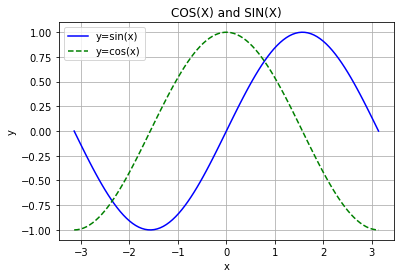

In [16]:
x = np.linspace(-np.pi, np.pi, num=100)

plt.plot(x, np.sin(x), '-b', label='y=sin(x)')
plt.plot(x, np.cos(x), '--g', label='y=cos(x)')

plt.title('COS(X) and SIN(X)')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

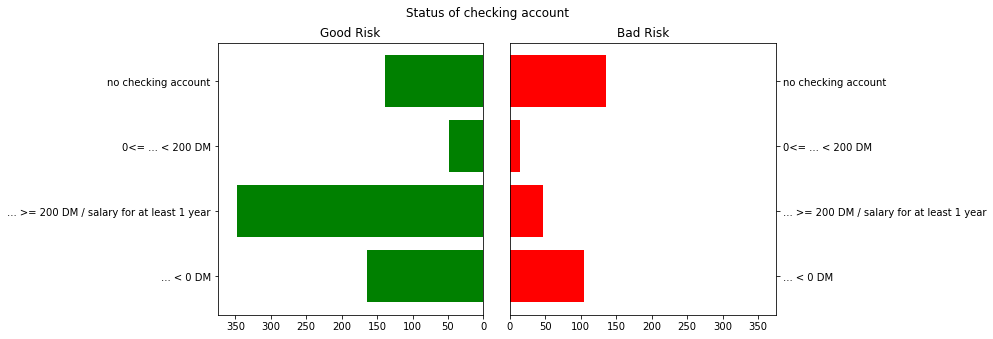

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_xlim(375, 0)
axs[1].set_xlim(0, 375)
fig.suptitle('Status of checking account')
plt.subplots_adjust(wspace=0.1)

bad = data.groupby('credit_risk')['status'].value_counts(sort=False)['bad']
good = data.groupby('credit_risk')['status'].value_counts(sort=False)['good']

axs[0].barh(good.index, good, color='g')
axs[0].set_title('Good Risk')
axs[1].barh(bad.index, bad, color='r')
axs[1].set_title('Bad Risk')
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

### Задание 8  (0.5 балла)

In [18]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

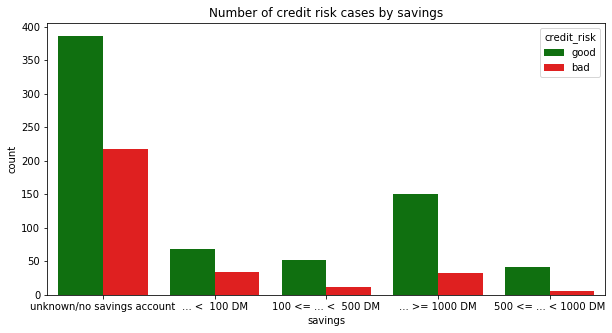

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='savings', hue='credit_risk', data=data, palette=['g', 'r'])
plt.title('Number of credit risk cases by savings')
plt.show()

По трудоёмкости написания кода и восприятию результата мне больше нравится второй вариант. Первый очевидно дольше писать, а по восприятию на вкус и цвет.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

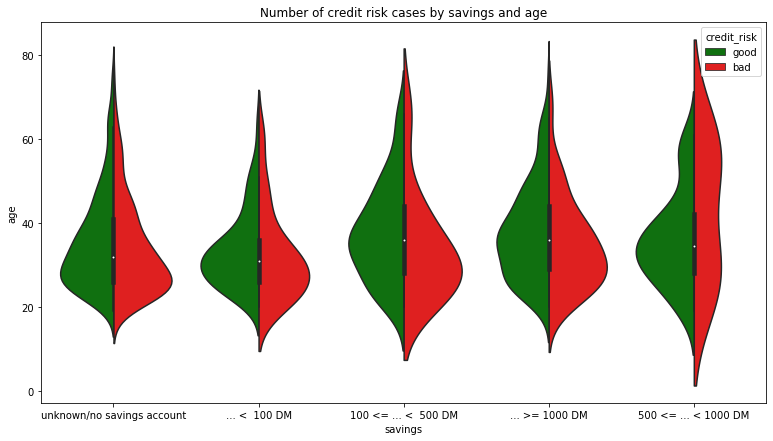

In [20]:
plt.figure(figsize=(13, 7))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=['g', 'r'], split=True)
plt.title('Number of credit risk cases by savings and age')
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

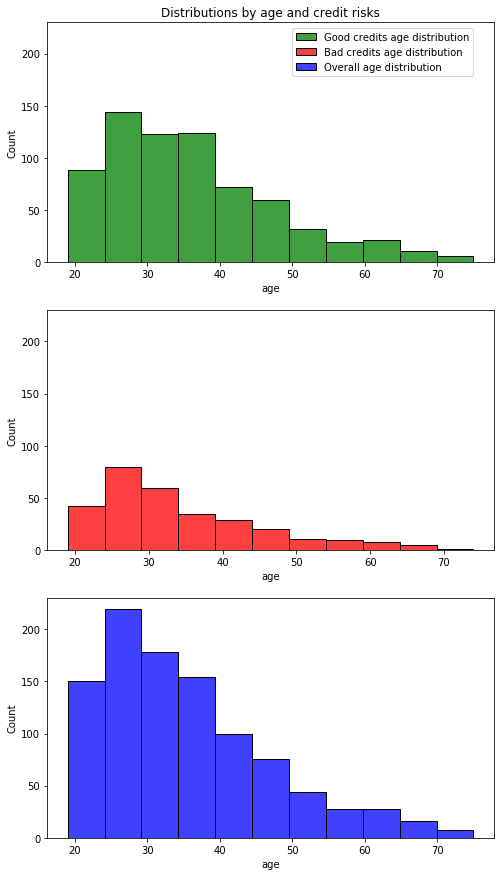

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15), sharey=True)
axes[0].set_title('Distributions by age and credit risks')

sns.histplot(data['age'].where(data.credit_risk == 'good'),
             ax=axes[0],
             kde=False,
             bins=11,
             color='g',
             label='Good credits age distribution')
sns.histplot(data['age'].where(data.credit_risk == 'bad'),
             ax=axes[1],
             kde=False,
             bins=11,
             color='r',
             label='Bad credits age distribution')
sns.histplot(data['age'],
             ax=axes[2],
             kde=False,
             bins=11,
             color='b',
             label='Overall age distribution')
fig.legend(loc='upper right', bbox_to_anchor=(0.83, 0.79))
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

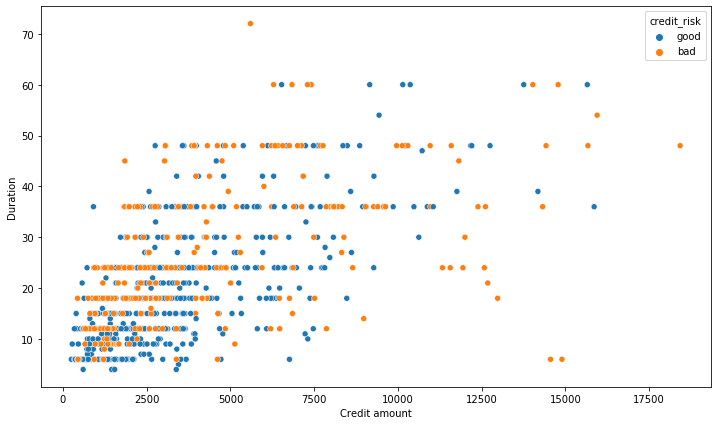

In [22]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=data, x="amount", y="duration", hue='credit_risk')
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [23]:
from mpl_toolkits.mplot3d import Axes3D

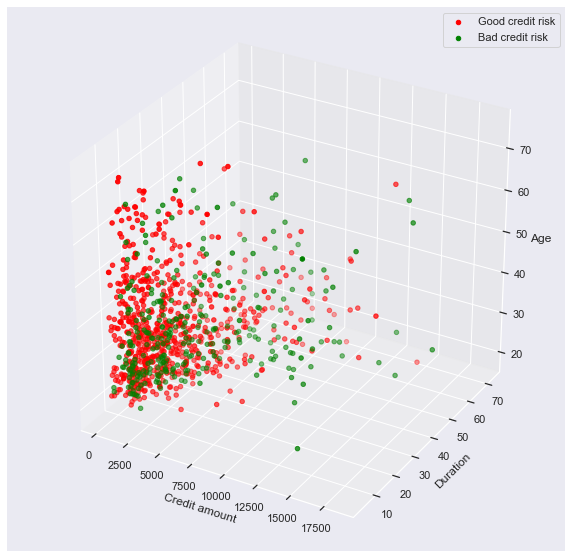

In [24]:
fig = plt.figure(figsize=(10, 10))
sns.set(palette='summer')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['amount'].where(data.credit_risk == 'good'),
           data['duration'].where(data.credit_risk == 'good'),
           data['age'].where(data.credit_risk == 'good'),
           c='r',
           label='Good credit risk')
ax.scatter(data['amount'].where(data.credit_risk == 'bad'),
           data['duration'].where(data.credit_risk == 'bad'),
           data['age'].where(data.credit_risk == 'bad'),
           c='g',
           label='Bad credit risk')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.legend()
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

Начнём с бинарных признаков:

In [25]:
data['credit_risk'] = (data['credit_risk'] == 'good').astype('int')
data['credit_risk'].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

In [26]:
data['telephone'] = (data['telephone'] == 'yes (under customer name)').astype('int')
data['telephone'].value_counts()

0    596
1    404
Name: telephone, dtype: int64

In [27]:
data['foreign_worker'] = (data['foreign_worker'] == 'yes').astype('int')
data['foreign_worker'].value_counts()

0    963
1     37
Name: foreign_worker, dtype: int64

In [28]:
data['people_liable'] = (data['people_liable'] == '3 or more').astype('int')
data['people_liable'].value_counts()

0    845
1    155
Name: people_liable, dtype: int64

Теперь порядковые признаки:

In [29]:
data['installment_rate'].value_counts()

< 20              476
25 <= ... < 35    231
20 <= ... < 25    157
>= 35             136
Name: installment_rate, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['temp'] = label.fit_transform(data['installment_rate'])

print(data['temp'].value_counts())
data.drop(labels=['temp'], axis=1, inplace=True)

2    476
1    231
0    157
3    136
Name: temp, dtype: int64


Как видим, с помощью fir_transform мы кодируем порядковый признак не по возрастанию, поэтому заполним ручками.


In [31]:
dct = {'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3}
data['installment_rate'] = data['installment_rate'].map(dct)

In [32]:
data['installment_rate'].value_counts()

0    476
2    231
1    157
3    136
Name: installment_rate, dtype: int64

In [33]:
data['employment_duration'].value_counts()

1 <= ... < 4 yrs    339
>= 7 yrs            253
4 <= ... < 7 yrs    174
< 1 yr              172
unemployed           62
Name: employment_duration, dtype: int64

In [34]:
dct = {'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4}
data['employment_duration'] = data['employment_duration'].map(dct)

In [35]:
data['present_residence'].value_counts()

>= 7 yrs            413
1 <= ... < 4 yrs    308
4 <= ... < 7 yrs    149
< 1 yr              130
Name: present_residence, dtype: int64

In [36]:
dct = {'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3}
data['present_residence'] = data['present_residence'].map(dct)

In [37]:
data['savings'].value_counts()

unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64

In [38]:
dct = {'unknown/no savings account': 0,
       '... <  100 DM': 1,
       '100 <= ... <  500 DM': 2,
       '500 <= ... < 1000 DM': 3,
       '... >= 1000 DM': 4}
data['savings'] = data['savings'].map(dct)

In [39]:
data['status'].value_counts()

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64

In [40]:
dct = {'no checking account': 0,
       '... < 0 DM': 1,
       '0<= ... < 200 DM': 2,
       '... >= 200 DM / salary for at least 1 year': 3}
data['status'] = data['status'].map(dct)

In [41]:
data['number_credits'].value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

In [42]:
dct = {'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3}
data['number_credits'] = data['number_credits'].map(dct)

Осталось разобраться с категориальными:

In [43]:
data['credit_history'].value_counts()

no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64

In [44]:
dum = pd.get_dummies(data['credit_history'], drop_first=True)
data.drop('credit_history', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)

In [45]:
data['personal_status_sex'].value_counts()

male : married/widowed                  548
female : non-single or male : single    310
female : single                          92
male : divorced/separated                50
Name: personal_status_sex, dtype: int64

In [46]:
dum = pd.get_dummies(data['personal_status_sex'], drop_first=True)
data.drop('personal_status_sex', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)

In [47]:
data['property'].value_counts()

building soc. savings agr./life insurance    332
unknown / no property                        282
car or other                                 232
real estate                                  154
Name: property, dtype: int64

In [48]:
dum = pd.get_dummies(data['property'], drop_first=True)
data.drop('property', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)

In [49]:
data['other_debtors'].value_counts()

none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64

In [50]:
dum = pd.get_dummies(data['other_debtors'], drop_first=True)
data.drop('other_debtors', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)

In [51]:
data['purpose'].value_counts()

furniture/equipment    280
others                 234
car (used)             181
car (new)              103
retraining              97
repairs                 50
domestic appliances     22
radio/television        12
business                12
vacation                 9
Name: purpose, dtype: int64

In [52]:
dum = pd.get_dummies(data['purpose'], drop_first=True)
data.drop('purpose', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)

In [53]:
data['housing'].value_counts()

rent        714
for free    179
own         107
Name: housing, dtype: int64

In [54]:
dum = pd.get_dummies(data['housing'], drop_first=True)
data.drop('housing', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)

In [55]:
data['other_installment_plans'].value_counts()

none      814
bank      139
stores     47
Name: other_installment_plans, dtype: int64

In [56]:
# так как большинство значений неизвестны, то лучше удалить столбец
data.drop('other_installment_plans', axis=1, inplace=True)

In [57]:
data['job'].value_counts()

skilled employee/official                     630
unskilled - resident                          200
manager/self-empl./highly qualif. employee    148
unemployed/unskilled - non-resident            22
Name: job, dtype: int64

In [58]:
dum = pd.get_dummies(data['job'], drop_first=True)
data.drop('job', axis = 1, inplace = True)
data = pd.concat((data, dum), axis = 1)

In [59]:
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,others,radio/television,repairs,retraining,vacation,own,rent,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident
0,0,18,1049,0,1,0,3,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,9,2799,0,2,2,1,36,1,1,...,1,0,0,0,0,0,0,1,0,0
2,1,12,841,1,3,2,3,23,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,...,1,0,0,0,0,0,0,0,0,1
4,0,12,2171,0,2,0,3,38,1,0,...,1,0,0,0,0,0,1,0,0,1


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   status                                       1000 non-null   int64
 1   duration                                     1000 non-null   int64
 2   amount                                       1000 non-null   int64
 3   savings                                      1000 non-null   int64
 4   employment_duration                          1000 non-null   int64
 5   installment_rate                             1000 non-null   int64
 6   present_residence                            1000 non-null   int64
 7   age                                          1000 non-null   int64
 8   number_credits                               1000 non-null   int64
 9   people_liable                                1000 non-null   int32
 10  telephone                

In [61]:
NumericData = data._get_numeric_data()
NumericData.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,others,radio/television,repairs,retraining,vacation,own,rent,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident
0,0,18,1049,0,1,0,3,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,9,2799,0,2,2,1,36,1,1,...,1,0,0,0,0,0,0,1,0,0
2,1,12,841,1,3,2,3,23,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,...,1,0,0,0,0,0,0,0,0,1
4,0,12,2171,0,2,0,3,38,1,0,...,1,0,0,0,0,0,1,0,0,1


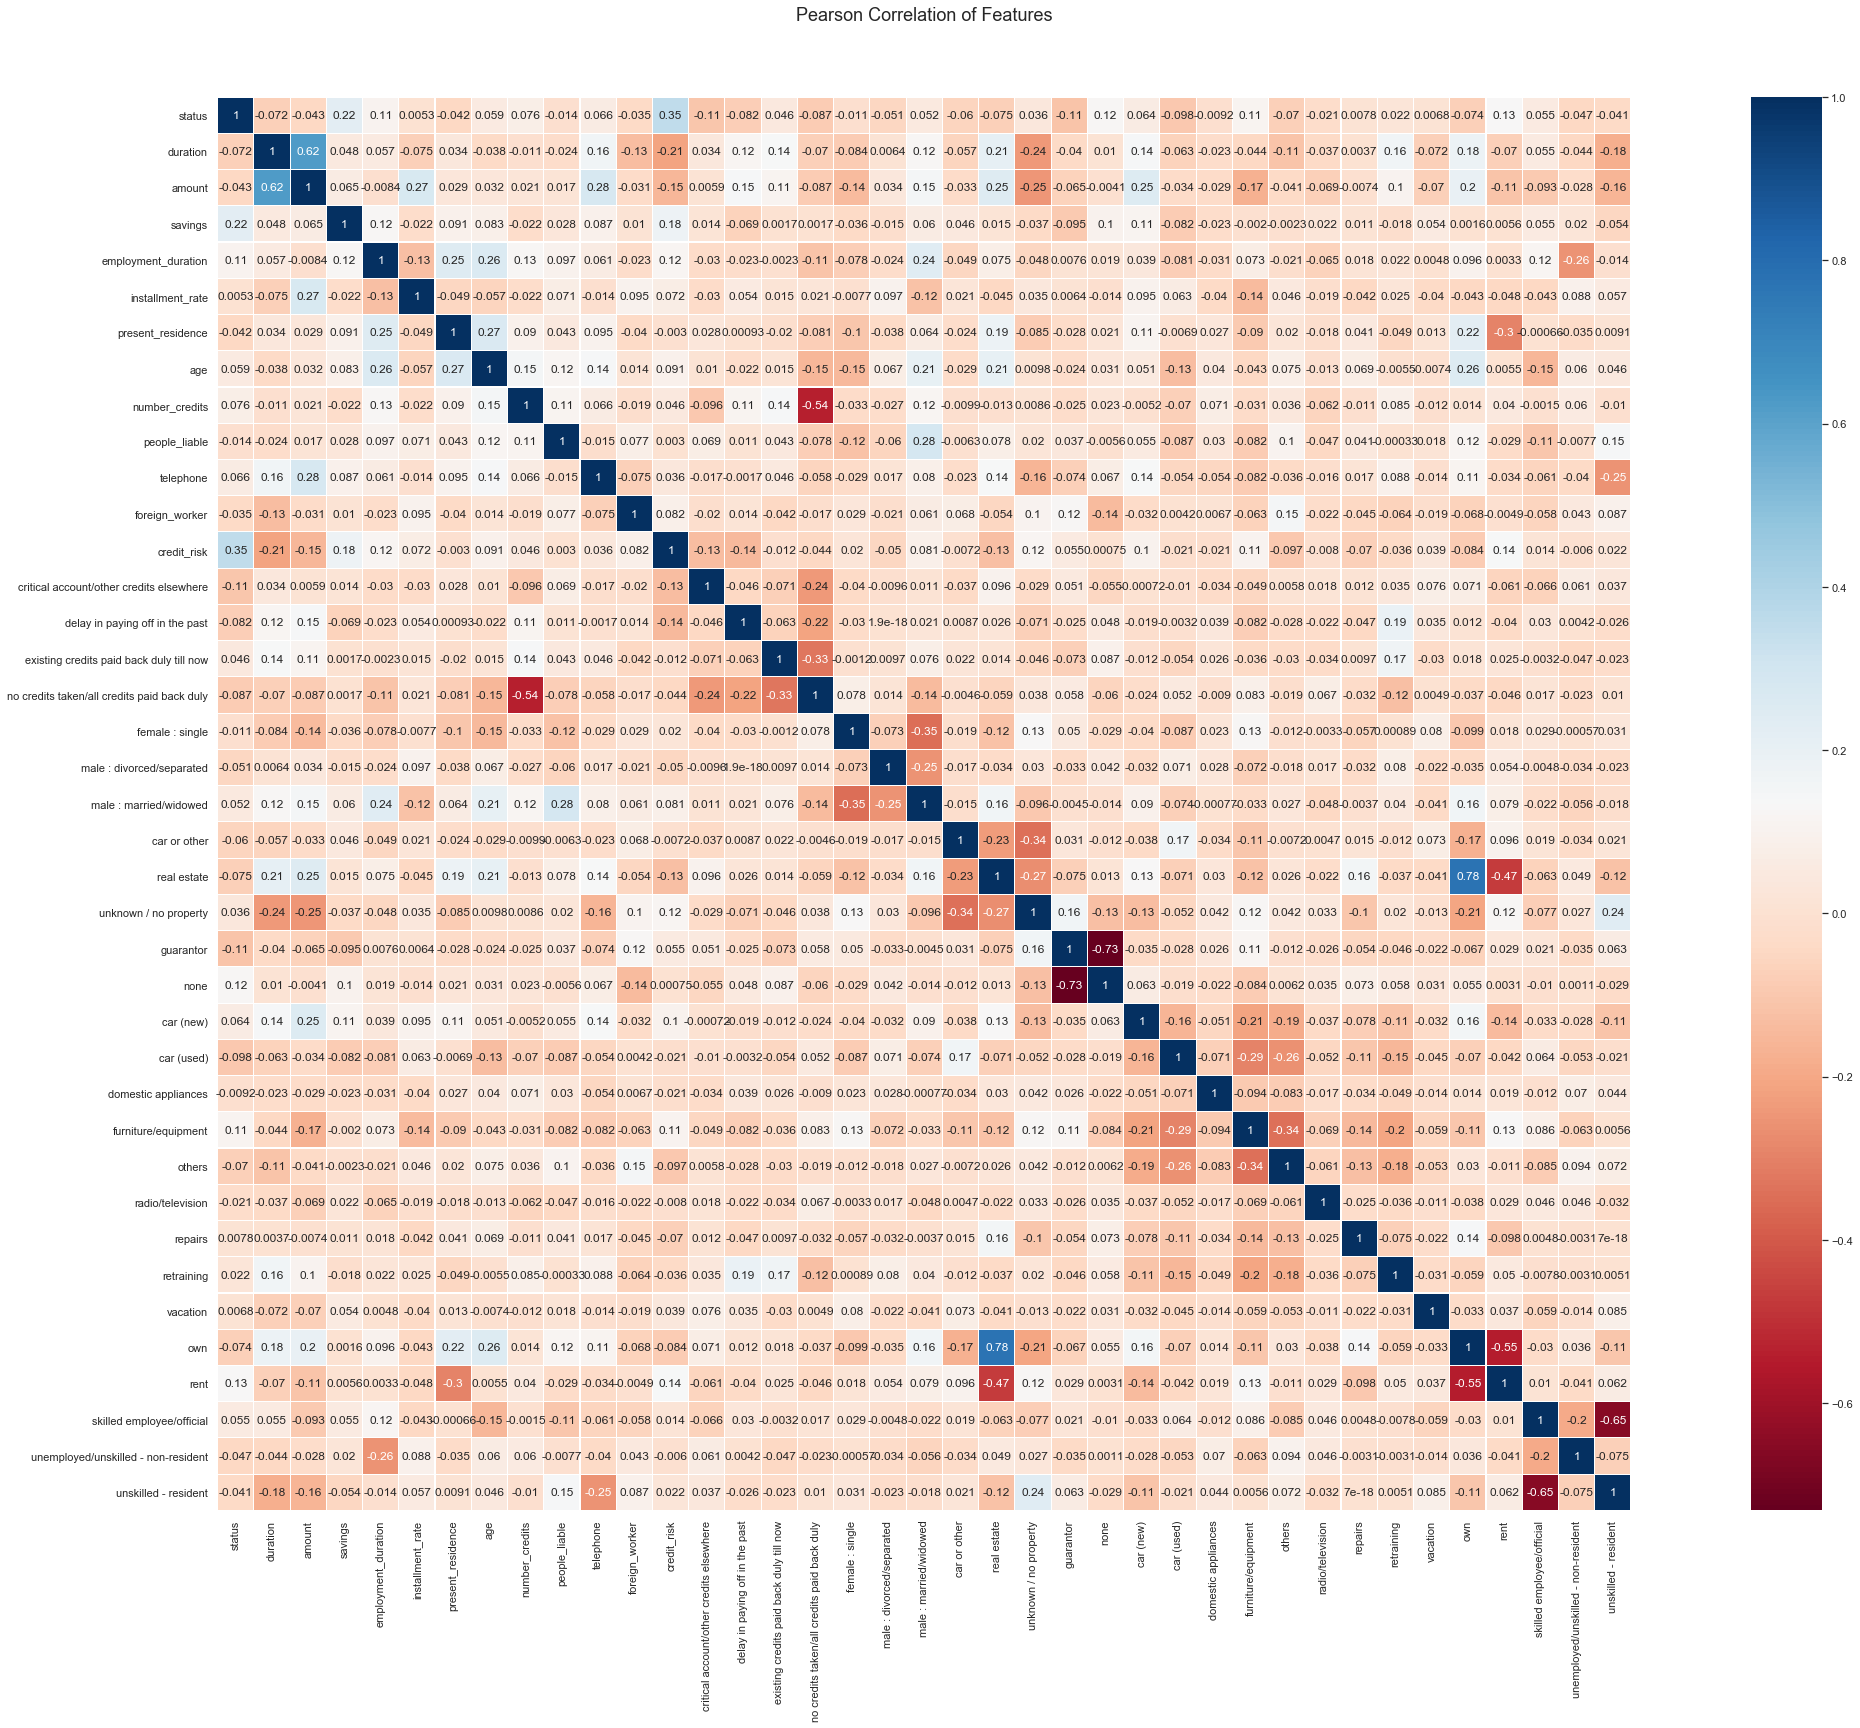

In [62]:
colormap = plt.cm.RdBu
plt.figure(figsize=(43, 26))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def predict1(Xtest: np.array) -> np.array:
    Xtest = [1 for i in Xtest if np.sum(i) > 0]
    return Xtest


# def predict2(Xtest: np.array) -> np.array:
#     res = []
#     for i in Xtest:
#         if np.sum(i) > 0:
#             res.append(1)
#         else: 
#             res.append(0)
#     return res



def predict3(Xtest: np.array) -> np.array:
    res = []
    for i in range(250): # size of y_test 
        if Xtest[i][33] - Xtest[i][34] + Xtest[i][13] < 0:
            res.append(1)
        else: 
            res.append(0)
    return res


X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print('predict 1 =', accuracy_score(y_test, predict1(X_test)))
#print('predict 2 =', accuracy_score(y_test, predict2(X_test)))
print('predict 3 =', accuracy_score(y_test, predict3(X_test)))

predict 1 = 0.66
predict 3 = 0.688
